In [ ]:
from google.colab import drive
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np

In [ ]:
drive.mount('/content/drive')

base_dir = '/content/drive/My Drive/Fresh and Rotten fruits dataset'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
test_dir = os.path.join(base_dir, 'test')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!ls '/content/drive/My Drive/Fresh and Rotten fruits dataset/train'
!ls '/content/drive/My Drive/Fresh and Rotten fruits dataset/validation'
!ls '/content/drive/My Drive/Fresh and Rotten fruits dataset/test'


Fresh  Rotten
Fresh  Rotten
Fresh  Rotten


In [ ]:
train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)


Found 19562 images belonging to 2 classes.


In [ ]:
validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary'
)



Found 2803 images belonging to 2 classes.


In [ ]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode='binary',
    shuffle=False
)

Found 5591 images belonging to 2 classes.


In [ ]:
AUTOTUNE = tf.data.experimental.AUTOTUNE

train_ds = tf.data.Dataset.from_generator(
    lambda: train_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 150, 150, 3], [None])
).cache().prefetch(buffer_size=AUTOTUNE)

val_ds = tf.data.Dataset.from_generator(
    lambda: validation_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 150, 150, 3], [None])
).cache().prefetch(buffer_size=AUTOTUNE)

test_ds = tf.data.Dataset.from_generator(
    lambda: test_generator,
    output_types=(tf.float32, tf.float32),
    output_shapes=([None, 150, 150, 3], [None])
).cache().prefetch(buffer_size=AUTOTUNE)

In [ ]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(150, 150, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2, 2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])


In [ ]:
model.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(),
              metrics=['accuracy'])

In [ ]:
history = model.fit(
    train_ds,
    steps_per_epoch=20,
    epochs=20,
    validation_data=val_ds,
    validation_steps=10
)


Epoch 1/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 213s 11s/step - accuracy: 0.4583 - loss: 0.7297 - val_accuracy: 0.5344 - val_loss: 0.6872
Epoch 2/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 123s 6s/step - accuracy: 0.5075 - loss: 0.6936 - val_accuracy: 0.6187 - val_loss: 0.6662
Epoch 3/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 111s 6s/step - accuracy: 0.5913 - loss: 0.6880 - val_accuracy: 0.6281 - val_loss: 0.6783
Epoch 4/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 116s 6s/step - accuracy: 0.6785 - loss: 0.6667 - val_accuracy: 0.6750 - val_loss: 0.6118
Epoch 5/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 115s 6s/step - accuracy: 0.6173 - loss: 0.6489 - val_accuracy: 0.7031 - val_loss: 0.5662
Epoch 6/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 117s 6s/step - accuracy: 0.7175 - loss: 0.5587 - val_accuracy: 0.7563 - val_loss: 0.5011
Epoch 7/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 115s 6s/step - accuracy: 0.6955 - loss: 0.5674 - val_accuracy: 0.7344 - val_loss: 0.5449
Epoch 8/20
20/20 ━━━━━━━━━━━━━━━━━━━━ 126s 7s/step - accuracy: 0.6778 - loss: 0.5900 - val_accuracy: 0.7875 - 

In [ ]:
test_loss, test_acc = model.evaluate(test_ds, steps=10)
print(f'Test accuracy: {test_acc}')

10/10 ━━━━━━━━━━━━━━━━━━━━ 9s 921ms/step - accuracy: 0.8763 - loss: 0.3456
Test accuracy: 0.878125011920929


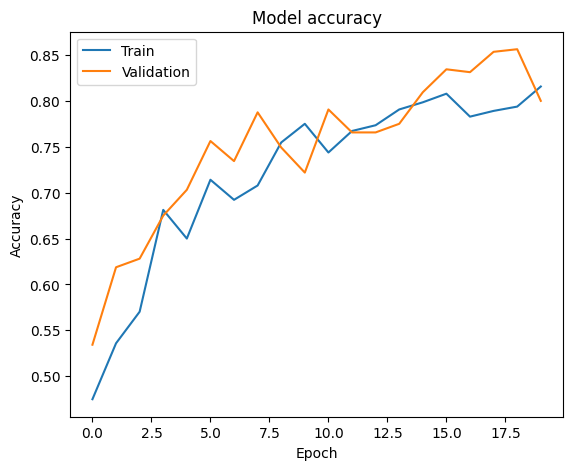

In [ ]:
plt.figure(figsize=(14,5))
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

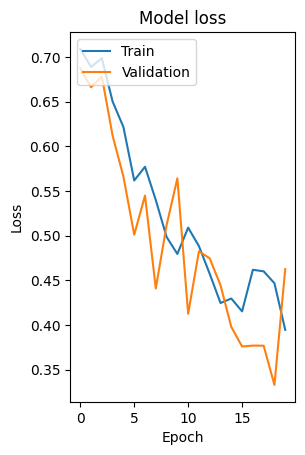

In [ ]:
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

In [ ]:
plt.show()


In [ ]:
Y_pred = model.predict(test_generator, steps=test_generator.samples // test_generator.batch_size + 1)
y_pred = np.where(Y_pred > 0.5, 1, 0).flatten()

/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


175/175 ━━━━━━━━━━━━━━━━━━━━ 162s 925ms/step


In [ ]:
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
print('Confusion Matrix')
print(conf_matrix)

In [ ]:
class_report = classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys())
print('Classification Report')
print(class_report)

Classification Report
              precision    recall  f1-score   support

       Fresh       0.91      0.66      0.76      2616
      Rotten       0.76      0.94      0.84      2975

    accuracy                           0.81      5591
   macro avg       0.83      0.80      0.80      5591
weighted avg       0.83      0.81      0.80      5591



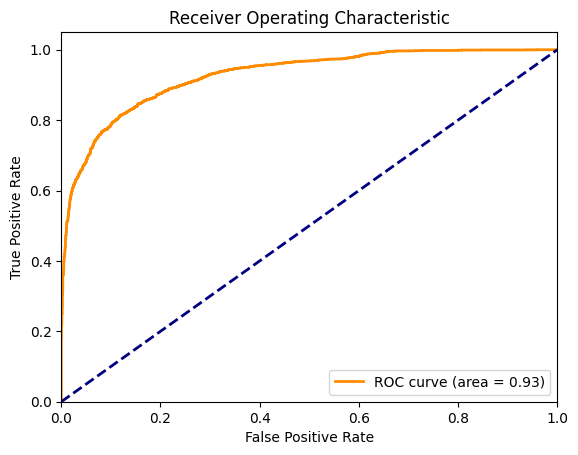

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, roc_curve, auc

fpr, tpr, _ = roc_curve(test_generator.classes, Y_pred)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()


In [ ]:
def predict_image(img_path):
    from tensorflow.keras.preprocessing import image
    img = image.load_img(img_path, target_size=(150, 150))
    img_array = image.img_to_array(img)
    img_array = np.expand_dims(img_array, axis=0) / 255.0

    prediction = model.predict(img_array)
    if prediction > 0.5:
        return 'Rotten'
    else:
        return 'Fresh'

img_path = '/content/drive/My Drive/Fresh and Rotten fruits dataset/test/Fresh/freshapple/a_f007.png'
prediction = predict_image(img_path)
print(f'The image is predicted to be: {prediction}')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 124ms/step
The image is predicted to be: Fresh


In [ ]:
model.save('/content/drive/My Drive/Colab Notebooks/Divyaa/autotune_model_87%.keras')

In [ ]:
# Save the model
model_save_path = '/content/drive/My Drive/Colab Notebooks/Divyaa/model.h5'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')

Model saved to /content/drive/My Drive/Colab Notebooks/Divyaa/model.h5


In [ ]:
# Save the model
model_save_path = '/content/drive/My Drive/Colab Notebooks/Divyaa/model.keras'
model.save(model_save_path)
print(f'Model saved to {model_save_path}')


Model saved to /content/drive/My Drive/Colab Notebooks/Divyaa/model.keras


from google.colab import drive
drive.mount('/content/drive')

# Load the saved model
model_load_path = '/content/drive/My Drive/Colab Notebooks/Divyaa/model.keras'
model = tf.keras.models.load_model(model_load_path)
print(f'Model loaded from {model_load_path}')


# Predict with a single image from the dataset
img_path = '/content/drive/My Drive/Fresh and Rotten fruits dataset/test/Rotten/rottenbanana/b_r044.png'  # Change to your image path
prediction = predict_image(img_path, model)
print(f'The image is predicted to be: {prediction}')



  7/175 ━━━━━━━━━━━━━━━━━━━━ 3:10 1s/step   

KeyboardInterrupt: 